# Optimización de Hiperparámetros - Caso Kyphosis

La Kyphosis es una curvatura convexa excesivamente anormal de la espira vertebral. El dataset kyphosis contiene 81 filas y 4 columnas. Representa datos de niños que han tenido intervenciones quirúrgicas a la columna. El dataset contiene las siguientes columnas:

*Entradas*

- Age: edad en meses
- Number: el número de vértebras involucradas
- Start: el número de la primera vértebra operada

*Salida*
- Kyphosis: vatiable categórica con valores present o absent que indica si se desarrolló kyphosis después de la operación


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('kyphosis.csv')

### Análisis Exploratorio

In [6]:
df.head(2)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14


In [8]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


<Axes: xlabel='Kyphosis', ylabel='count'>

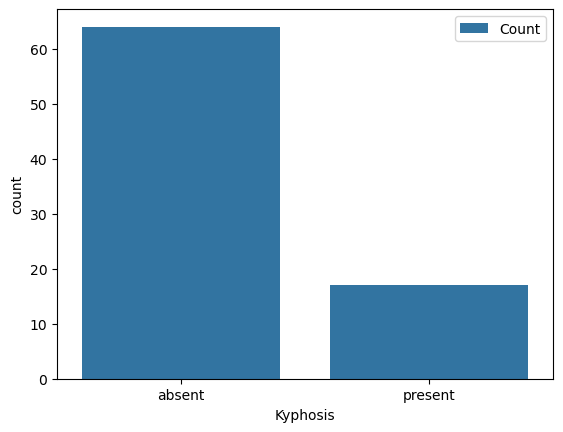

In [10]:
sns.countplot(data=df, x='Kyphosis', label = "Count")

### Formulación del modelo

In [13]:
X = df[['Age','Number','Start']]
y = df['Kyphosis']

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [17]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [19]:
encoder.classes_

array(['absent', 'present'], dtype=object)

### Cross Validation

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Modelo Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc = RandomForestClassifier(n_estimators=150, random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [33]:
y_pred = rfc.predict(X_test)

In [35]:
accuracy_score(y_test,y_pred)

0.8

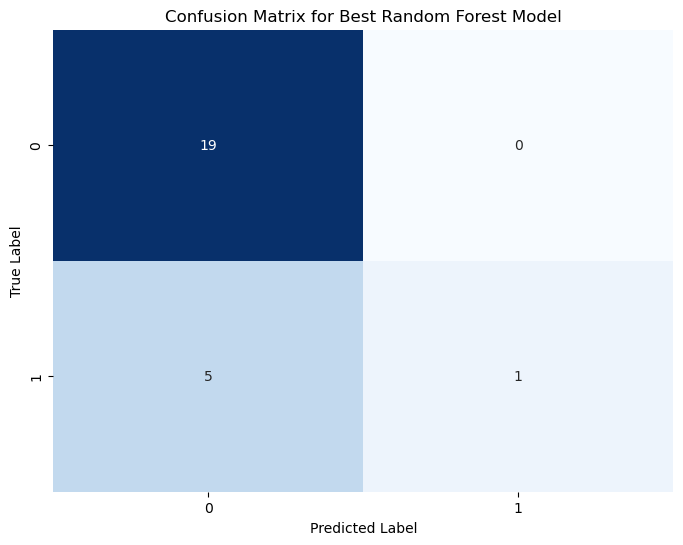


Classification Report for Best Model:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        19
           1       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



In [43]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Best Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report for additional insights
print("\nClassification Report for Best Model:\n", classification_report(y_test, y_pred))

### Tuning de Hiperparámetros

In [46]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [48]:
Counter(y)

Counter({0: 64, 1: 17})

In [50]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
Counter(y)

Counter({0: 64, 1: 64})

In [54]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test,y_pred)

0.8974358974358975

In [56]:
confusion_matrix(y_test,y_pred)

array([[20,  2],
       [ 2, 15]])

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir los parametos para el grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at each split
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]  # Method for sampling data
}


In [60]:
# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Extract best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Cross-validation Accuracy: {:.2f}".format(best_score))

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Print a classification report
print("\nClassification Report for Best Model:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimat

/Users/gio/Anaconda/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
426 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/gio/Anaconda/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/gio/Anaconda/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/gio/Anaconda/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_param

Best Parameters:  {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-validation Accuracy: 0.88

Classification Report for Best Model:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89        22
           1       0.88      0.82      0.85        17

    accuracy                           0.87        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.87      0.87      0.87        39



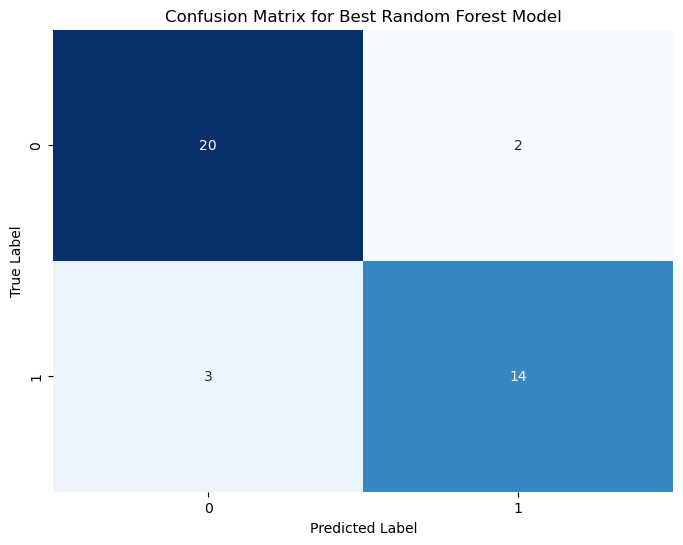


Classification Report for Best Model:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89        22
           1       0.88      0.82      0.85        17

    accuracy                           0.87        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.87      0.87      0.87        39



In [61]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Best Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report for additional insights
print("\nClassification Report for Best Model:\n", classification_report(y_test, y_pred))